<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module3-reshape-data/LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
#!pip install seaborn --upgrade
#import os
#os.kill(os.getpid(), 9)

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
# We need to use version >= 0.9.0
print(sns.__version__)

0.9.0


"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [0]:
table1.head().T

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
table1.describe().T

,count,mean,std,min,25%,50%,75%,max
treatmenta,2.0,9.500000,9.192388,3.0,6.25,9.5,12.75,16.0
treatmentb,3.0,4.666667,5.507571,1.0,1.50,2.0,6.50,11.0


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [0]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
tidy = table1.reset_index() \
             .melt(id_vars='index') \
             .rename(columns={'index': 'name',
                              'variable': 'trt',
                              'value': 'result'})
tidy['trt'] = tidy['trt'].str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


### Extra Challenge: Encoding
What if we wanted to change `a` and `b` to 0 and 1?

In [0]:
tidy['trt'].replace('a', 0).replace('b', 0)

0    0
1    0
2    0
3    0
4    0
5    0
Name: trt, dtype: int64

In [0]:
tidy['trt'].map({'a': 0, 'b': 1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [0]:
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int32

In [0]:
tidy['trt'].apply(lambda x: ord(x) - ord('a'))

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [0]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [0]:
# pd.pivot_table() can be thought of as the Inverse of pd.melt()
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

Run these cells to load the data

In [0]:
%cd instacart_2017_05_01

C:\Users\Joseph\instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
# products DataFrame
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [0]:
# How to join orders and products with no columns in common?
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
# Shares a feature with orders AND products
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = products[['product_id', 'product_name']] \
                .merge(order_products[['order_id', 'product_id']]) \
                .merge(orders[['order_id', 'order_hour_of_day']])

In [0]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (33819106, 4), (3421083, 7), (33819106, 4))

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
# This is equivalent...
#condition = ((merged['product_name']=='Half Baked Frozen Yogurt') |
#             (merged['product_name']=='Half and Half Ultra Pasteurized'))
# To this:
condition = merged['product_name'].isin(product_names)
subset = merged[condition]

In [0]:
merged.shape, subset.shape

((33819106, 4), (5978, 4))

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']==product_names[0]]
cream = subset[subset['product_name']==product_names[1]]

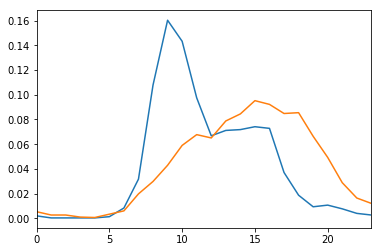

In [0]:
(cream['order_hour_of_day'].value_counts(normalize=True) \
                          .sort_index()).plot()

# Doesn't this look like the data for the red line in Instacart's plot?
(froyo['order_hour_of_day'].value_counts(normalize=True) \
                          .sort_index()).plot();

### 2. crosstab

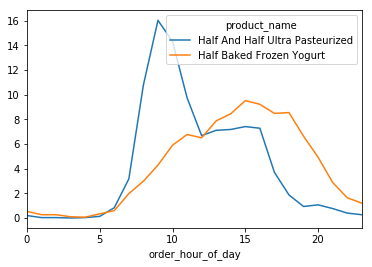

In [0]:
(pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns') * 100).plot();

### 3. pivot_table

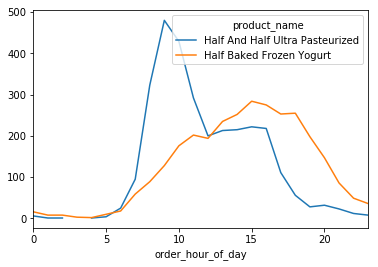

In [0]:
subset.pivot_table(index='order_hour_of_day',
                   columns='product_name',
                   values='order_id',
                   aggfunc=len).plot();

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'],
                    subset['product_name'],
                    normalize=True)
melted = table.reset_index() \
              .melt(id_vars='order_hour_of_day') \
              .rename(columns={'order_hour_of_day': 'Hour of Day Ordered',
                              'product_name': 'Product',
                              'value': 'Percent of Orders by Product'})

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

## Table 2 --> Tidy

In [0]:
tidy2 = table2.T.reset_index() \
                .melt(id_vars='index') \
                .rename(columns={'index': 'name',
                                 'variable': 'trt',
                                 'value': 'result'})

tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2['result'] = tidy2['result'].replace(np.NaN, '-')

In [0]:
tidy2

,name,trt,result
0,John Smith,a,-
1,Jane Doe,a,16
2,Mary Johnson,a,3
3,John Smith,b,2
4,Jane Doe,b,11
5,Mary Johnson,b,1


## Tidy --> Table 2

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
untidy = tidy.pivot(index='trt', columns='name', values='result') \
             .rename(index={'a': 'treatmenta', 'b': 'treatmentb'})
untidy = untidy[['John Smith', 'Jane Doe', 'Mary Johnson']]

In [0]:
untidy

name,John Smith,Jane Doe,Mary Johnson
trt,,,
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [0]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights_pivot = flights.pivot(index='year', columns='month', values='passengers')

In [0]:
flights_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

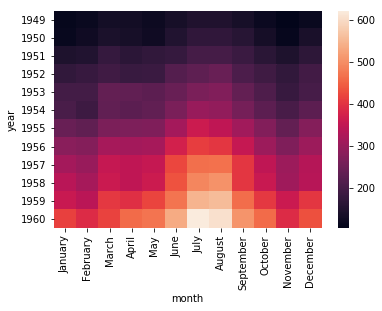

In [0]:
# Graph flights_pivot heatmap
sns.heatmap(data=flights_pivot);

In [0]:
# Replicate more of Instacart's visualization showing 
# "Hour of Day Ordered" vs "Percent of Orders by Product"
top_products = merged['product_name'].value_counts()[:50].reset_index()
top_products = top_products.rename(columns={'index': 'product_name', 'product_name': 'count'})

In [0]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
subset = merged[merged['product_name'].isin(top_products['product_name'])]

In [0]:
subset.head()

,product_id,product_name,order_id,order_hour_of_day
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11
18,9076,Blueberries,5319,14
20,16797,Strawberries,5319,14
23,43352,Raspberries,5319,14


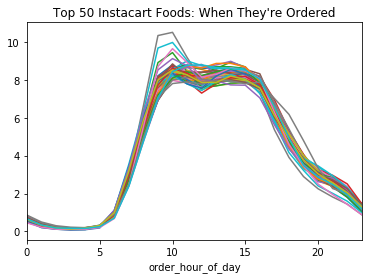

In [0]:
(pd.crosstab(subset['order_hour_of_day'], subset['product_name'],
            normalize='columns') * 100).plot(legend=None, title='Top 50 Instacart Foods: When They\'re Ordered');